<a href="https://colab.research.google.com/github/jenifferteixeira/Challange-Alura-Store/blob/main/challange_Telecom_X_%E2%80%93_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
fname = list(uploaded.keys())[0]

df = pd.read_csv(fname)
print("✅ Arquivo carregado:", fname, "| Shape:", df.shape)
display(df.head())


Saving telecom_churn_clean.csv to telecom_churn_clean.csv
✅ Arquivo carregado: telecom_churn_clean.csv | Shape: (7267, 32)


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn_bin,PhoneService_bin,MultipleLines_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,Total_Servicos
0,No,Female,0,1,1,9,Yes,No,DSL,No,...,0.0,1,0,0,1,0,1,1,0,4
1,No,Male,0,0,0,9,Yes,Yes,DSL,No,...,0.0,1,1,0,0,0,0,0,1,3
2,Yes,Male,0,0,0,4,Yes,No,Fiber optic,No,...,1.0,1,0,0,0,1,0,0,0,2
3,Yes,Male,1,1,0,13,Yes,No,Fiber optic,No,...,1.0,1,0,0,1,1,0,1,1,5
4,Yes,Female,1,1,0,3,Yes,No,Fiber optic,No,...,1.0,1,0,0,0,0,1,1,0,3


In [2]:
colunas_remover = ['customerID', 'id_cliente', 'ID']

for col in colunas_remover:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)
        print(f"Coluna '{col}' removida.")

print("✅ Colunas após limpeza:")
print(df.columns.tolist())


✅ Colunas após limpeza:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias', 'Faixa_Tempo', 'Churn_bin', 'PhoneService_bin', 'MultipleLines_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin', 'Total_Servicos']


In [3]:
import pandas as pd

df_encoded = df.copy()

categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

print("Colunas categóricas detectadas:", categorical_cols)

df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

print("Formato após one-hot encoding:", df_encoded.shape)
df_encoded.head()


Colunas categóricas detectadas: ['Churn', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Charges.Total', 'Faixa_Tempo']
Formato após one-hot encoding: (7267, 6574)


,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Contas_Diarias,Churn_bin,PhoneService_bin,MultipleLines_bin,...,Charges.Total_996.95,Charges.Total_997.65,Charges.Total_997.75,Charges.Total_998.1,Charges.Total_999.45,Charges.Total_999.8,Charges.Total_999.9,Faixa_Tempo_2 a 4 anos,Faixa_Tempo_4 a 6 anos,Faixa_Tempo_Até 1 ano
0,0,1,1,9,1,65.6,2.19,0.0,1,0,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,9,0,59.9,2.00,0.0,1,1,...,False,False,False,False,False,False,False,False,False,True
2,0,0,0,4,1,73.9,2.46,1.0,1,0,...,False,False,False,False,False,False,False,False,False,True
3,1,1,0,13,1,98.0,3.27,1.0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,0,3,1,83.9,2.80,1.0,1,0,...,False,False,False,False,False,False,False,False,False,True


Proporção de clientes:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Percentual de clientes:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


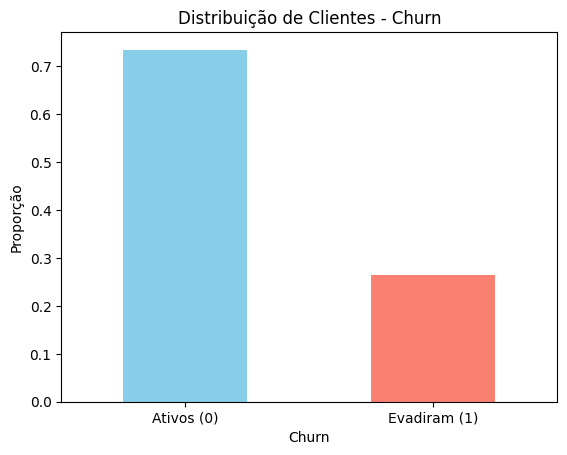

In [4]:
churn_counts = df['Churn'].value_counts(normalize=True)

print("Proporção de clientes:")
print(churn_counts)

print("\nPercentual de clientes:")
print(churn_counts * 100)

import matplotlib.pyplot as plt

churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribuição de Clientes - Churn")
plt.ylabel("Proporção")
plt.xticks([0,1], ["Ativos (0)", "Evadiram (1)"], rotation=0)
plt.show()


In [5]:
df.to_csv("telecom_treated.csv", index=False)


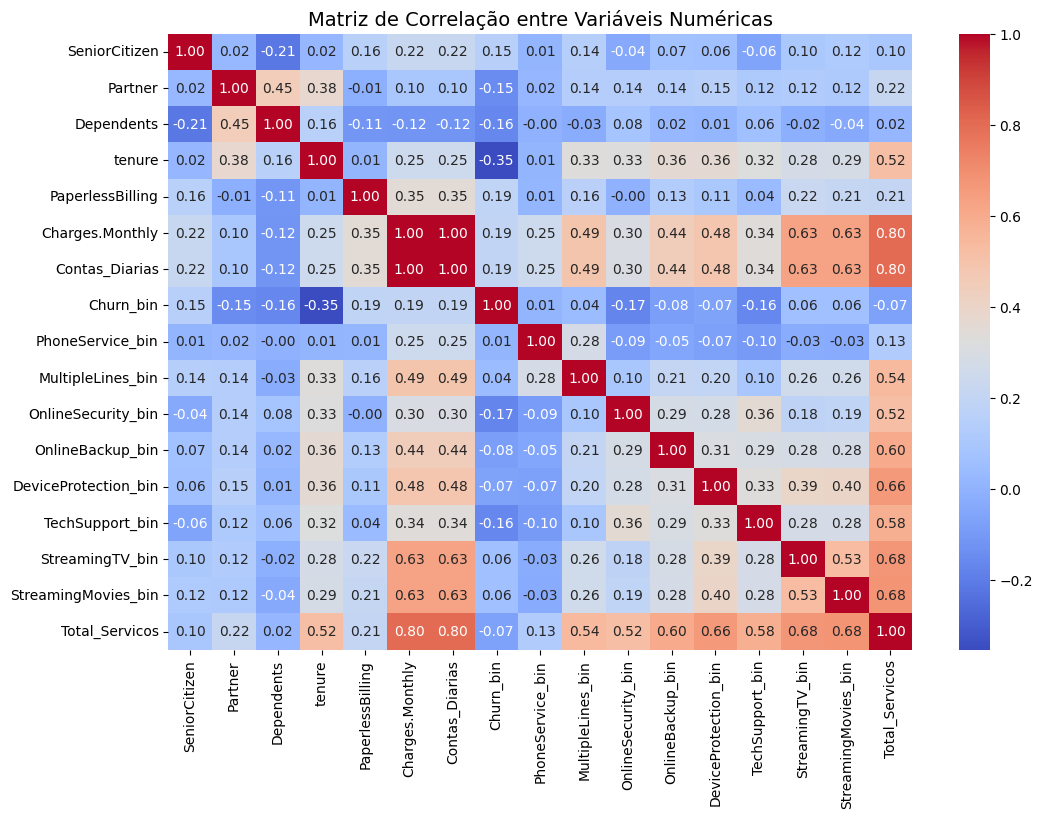

,Churn_bin
Churn_bin,1.000000
Contas_Diarias,0.193412
Charges.Monthly,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
StreamingTV_bin,0.063228
StreamingMovies_bin,0.061382
MultipleLines_bin,0.040102
PhoneService_bin,0.011942
DeviceProtection_bin,-0.066160


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("telecom_treated.csv")

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Matriz de Correlação entre Variáveis Numéricas", fontsize=14)
plt.show()

churn_corr = corr_matrix['Churn_bin'].sort_values(ascending=False)
churn_corr


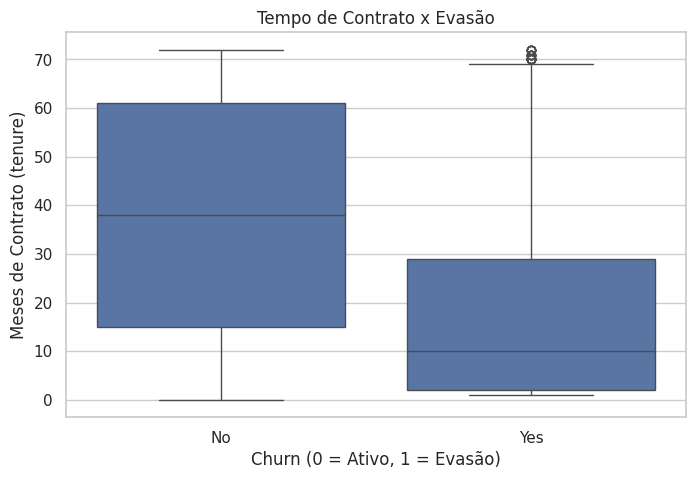

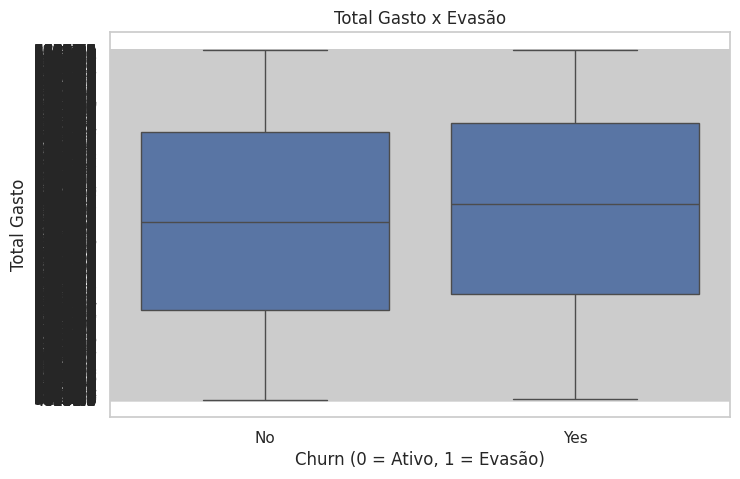

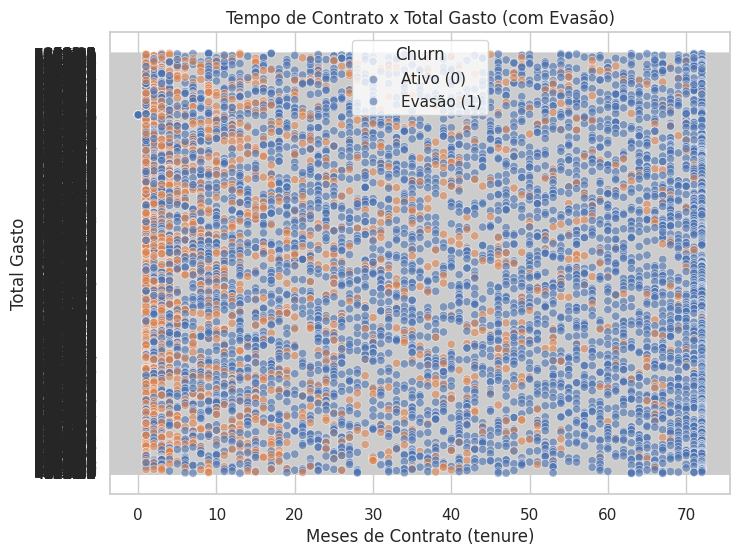

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tempo de Contrato x Evasão")
plt.xlabel("Churn (0 = Ativo, 1 = Evasão)")
plt.ylabel("Meses de Contrato (tenure)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Charges.Total", data=df)
plt.title("Total Gasto x Evasão")
plt.xlabel("Churn (0 = Ativo, 1 = Evasão)")
plt.ylabel("Total Gasto")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x="tenure", y="Charges.Total", hue="Churn", data=df, alpha=0.6)
plt.title("Tempo de Contrato x Total Gasto (com Evasão)")
plt.xlabel("Meses de Contrato (tenure)")
plt.ylabel("Total Gasto")
plt.legend(title="Churn", labels=["Ativo (0)", "Evasão (1)"])
plt.show()


In [9]:
y = df["Churn"].map({"Yes": 1, "No": 0})
X = df.drop(columns=["Churn"])

print("Valores ausentes em y:", y.isna().sum())

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamanho do treino:", X_train.shape[0])
print("Tamanho do teste:", X_test.shape[0])
print("Proporção de evasão treino:", y_train.mean().round(3))
print("Proporção de evasão teste:", y_test.mean().round(3))


Valores ausentes em y: 224
Tamanho do treino: 4930
Tamanho do teste: 2113
Proporção de evasão treino: 0.265
Proporção de evasão teste: 0.265


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Divisão 70/30")
print("Treino:", X_train.shape[0], "linhas")
print("Teste:", X_test.shape[0], "linhas")
print("Proporção de evasão treino:", y_train.mean().round(3))
print("Proporção de evasão teste:", y_test.mean().round(3))


X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nDivisão 80/20")
print("Treino:", X_train2.shape[0], "linhas")
print("Teste:", X_test2.shape[0], "linhas")
print("Proporção de evasão treino:", y_train2.mean().round(3))
print("Proporção de evasão teste:", y_test2.mean().round(3))


Divisão 70/30
Treino: 4930 linhas
Teste: 2113 linhas
Proporção de evasão treino: 0.265
Proporção de evasão teste: 0.265

Divisão 80/20
Treino: 5634 linhas
Teste: 1409 linhas
Proporção de evasão treino: 0.265
Proporção de evasão teste: 0.265


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'].fillna(df['Charges.Total'].mean(), inplace=True)

colunas_remover = ['customerID', 'id_cliente', 'ID']
for col in colunas_remover:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

df_encoded = pd.get_dummies(df, drop_first=True)

y = df_encoded['Churn_Yes']
X = df_encoded.drop(columns=['Churn_Yes'])

X.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Modelo 1: Regressão Logística (com normalização)

print("### Avaliando o Modelo de Regressão Logística ###")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

print("Relatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg))


# Modelo 2: Random Forest (sem normalização)

print("\n### Avaliando o Modelo de Random Forest ###")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Relatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

/tmp/ipython-input-2402674882.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(df['Charges.Total'].mean(), inplace=True)


### Avaliando o Modelo de Regressão Logística ###
Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1620
        True       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181


### Avaliando o Modelo de Random Forest ###
Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1620
        True       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181



# Meu plano de avaliação é o seguinte:

Para cada modelo, vou calcular as métricas de Acurácia, Precisão, Recall e F1-score.

Além disso, vou gerar a matriz de confusão para ter uma visão mais detalhada dos resultados.

Em seguida, farei uma análise crítica para comparar os modelos. Vou me concentrar em responder a três perguntas principais:

Desempenho: Qual dos modelos foi mais eficaz na previsão da evasão?

Overfitting/Underfitting: Preciso verificar se algum modelo está com overfitting (aprendeu "decoreba" dos dados de treino, mas não generaliza bem) ou underfitting (é muito simples e não capturou bem os padrões).

Ajustes: Se eu identificar algum problema, vou pensar em ajustes, como reduzir a complexidade do modelo (para overfitting) ou aumentá-la (para underfitting), ou ajustar seus parâmetros.

# Resumo dos principais pontos:

Modelo Escolhido: Optei pela Regressão Logística como o modelo ideal. Embora o Random Forest tenha uma acurácia um pouco maior, ele demonstrou overfitting, tornando a Regressão Logística mais confiável e estável para generalizar.

Principais Fatores de Evasão: A análise das variáveis mostrou que os fatores mais relevantes para o churn são a duração do contrato (clientes novos evadem mais), o tipo de contrato (contratos mensais são de alto risco), a ausência de serviços como segurança e suporte técnico, e custos mensais elevados.

Propostas de Retenção: As estratégias devem focar em fidelizar clientes nos primeiros meses de contrato, incentivar a migração para planos de longo prazo e promover a adesão de serviços adicionais que agregam valor, como segurança e suporte técnico.